X0 → X1 → X3 → X6

X0 → X2 → X4 → X6

X5 → X4

X5 → X7

In [2]:
import numpy as np
import pandas as pd

np.random.seed(42)
n_samples = 1000

# Exogenous variables (noise)
X0 = np.random.normal(0, 1, n_samples)
X5 = np.random.normal(0, 1, n_samples)

# Endogenous variables
X1 = 0.9 * X0 + np.random.normal(0, 0.3, n_samples)
X2 = -0.8 * X0 + np.random.normal(0, 0.3, n_samples)
X3 = 0.7 * X1 + np.random.normal(0, 0.3, n_samples)
X4 = 0.6 * X2 + 0.5 * X5 + np.random.normal(0, 0.3, n_samples)
X6 = 0.7 * X3 + 0.7 * X4 + np.random.normal(0, 0.3, n_samples)
X7 = 0.9 * X5 + np.random.normal(0, 0.3, n_samples)

# Stack into a matrix
data = np.column_stack([X0, X1, X2, X3, X4, X5, X6, X7])
columns = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7']
df = pd.DataFrame(data, columns=columns)

import networkx as nx

true_graph = nx.DiGraph()
true_graph.add_edges_from([
    ('X0', 'X1'),
    ('X0', 'X2'),
    ('X1', 'X3'),
    ('X2', 'X4'),
    ('X3', 'X6'),
    ('X4', 'X6'),
    ('X5', 'X4'),
    ('X5', 'X7')
])

In [13]:
from pc_gcastle import PC 

pc = PC(variant='stable', alpha=0.01, ci_test='spearman')
pc.learn(df.values, columns=columns)

print("Learned skeleton (CPDAG):")
print(pd.DataFrame(pc.causal_matrix, index=columns, columns=columns))

ci_test is now: spearman
Learned skeleton (CPDAG):
    X0  X1  X2  X3  X4  X5  X6  X7
X0   0   1   1   0   0   0   0   0
X1   1   0   0   1   0   0   0   0
X2   1   0   0   0   1   0   0   0
X3   0   1   0   0   0   0   1   0
X4   0   0   0   0   0   0   0   0
X5   0   0   0   0   1   0   1   1
X6   0   0   0   0   1   0   0   0
X7   0   0   0   0   0   1   0   0


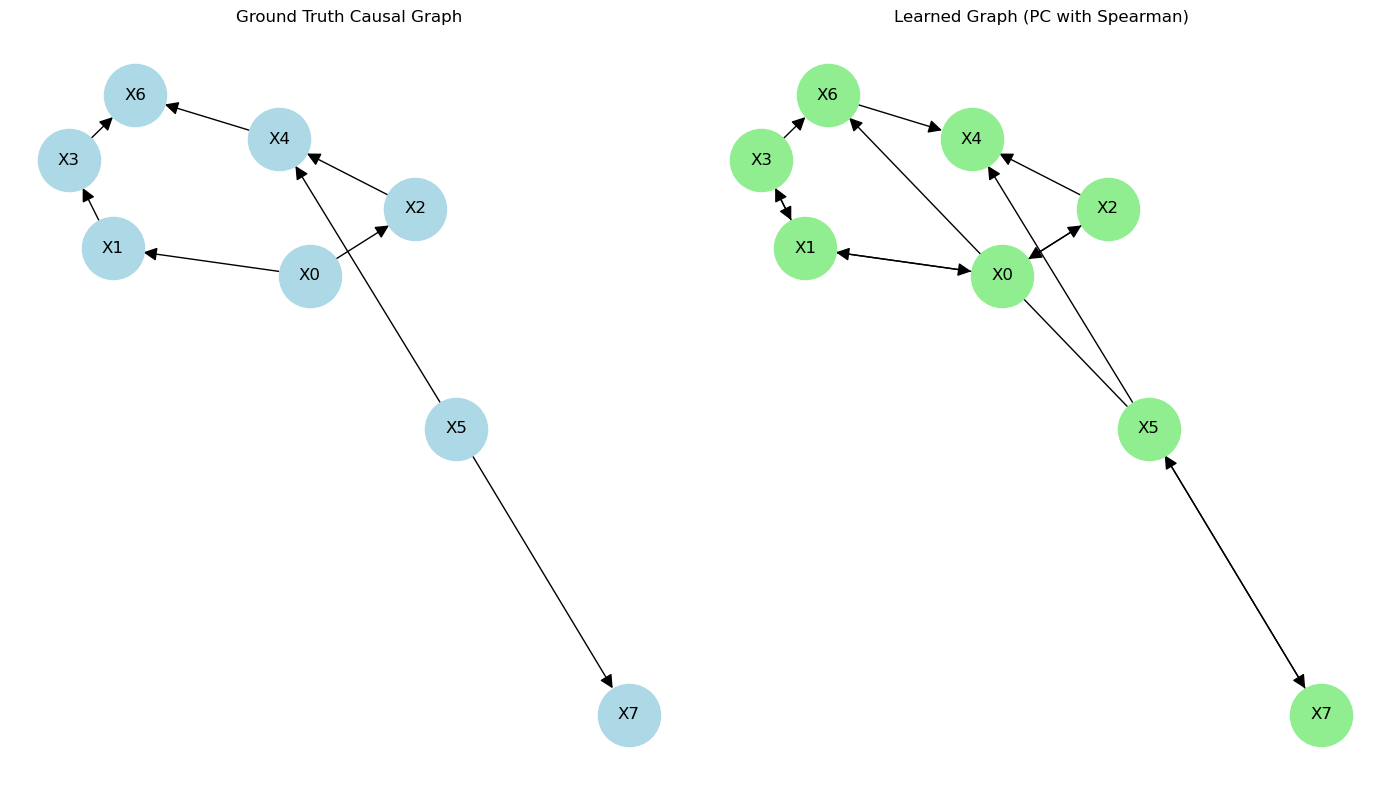

In [14]:
import matplotlib.pyplot as plt

# Get learned graph
learned_graph = nx.DiGraph(pc.causal_matrix)
learned_graph = nx.relabel_nodes(learned_graph, dict(enumerate(columns)))

# Position nodes using the same layout
pos = nx.spring_layout(true_graph, seed=42)  # fixed layout for consistency

plt.figure(figsize=(14, 8))

# Plot true graph
plt.subplot(1, 2, 1)
nx.draw(true_graph, pos, with_labels=True, node_color='lightblue',
        edge_color='black', node_size=2000, arrowsize=20, font_size=12)
plt.title("Ground Truth Causal Graph")

# Plot learned graph
plt.subplot(1, 2, 2)
nx.draw(learned_graph, pos, with_labels=True, node_color='lightgreen',
        edge_color='black', node_size=2000, arrowsize=20, font_size=12)
plt.title("Learned Graph (PC with Spearman)")

plt.tight_layout()
plt.show()

In [15]:
from pc_gcastle import PC 


pc2 = PC(variant='stable', alpha=0.01, ci_test='mutual_info')
pc2.learn(df.values, columns=columns)

ci_test is now: mutual_info


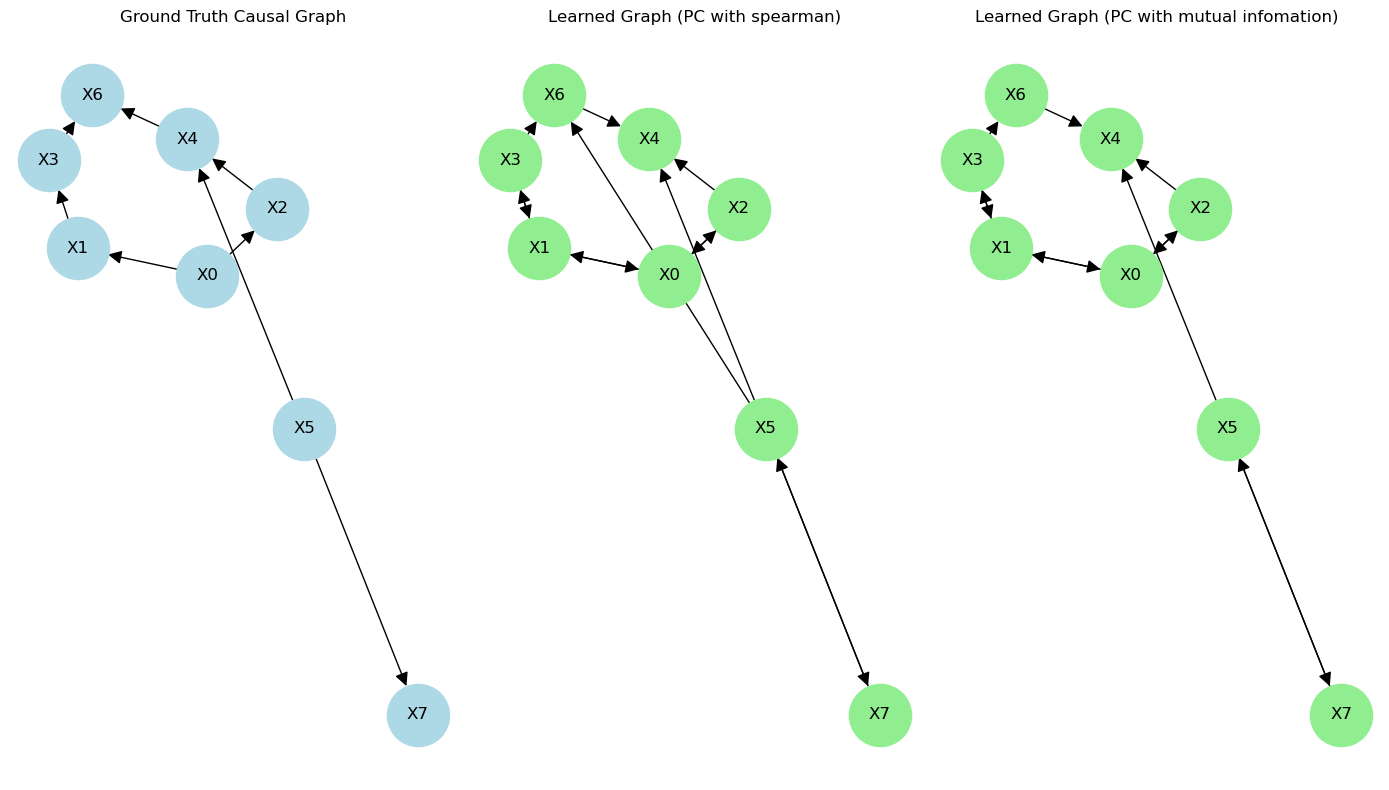

In [18]:
import matplotlib.pyplot as plt

# Get learned graph 1
learned_graph = nx.DiGraph(pc.causal_matrix)
learned_graph = nx.relabel_nodes(learned_graph, dict(enumerate(columns)))

# Get learned graph 2
learned_graph2 = nx.DiGraph(pc2.causal_matrix)
learned_graph2 = nx.relabel_nodes(learned_graph2, dict(enumerate(columns)))

# Position nodes using the same layout
pos = nx.spring_layout(true_graph, seed=42)  # fixed layout for consistency

plt.figure(figsize=(14, 8))

# Plot true graph
plt.subplot(1, 3, 1)
nx.draw(true_graph, pos, with_labels=True, node_color='lightblue',
        edge_color='black', node_size=2000, arrowsize=20, font_size=12)
plt.title("Ground Truth Causal Graph")

# Plot learned graph 1
plt.subplot(1, 3, 2)
nx.draw(learned_graph, pos, with_labels=True, node_color='lightgreen',
        edge_color='black', node_size=2000, arrowsize=20, font_size=12)
plt.title("Learned Graph (PC with spearman)")

# Plot learned graph 2
plt.subplot(1, 3, 3)
nx.draw(learned_graph2, pos, with_labels=True, node_color='lightgreen',
        edge_color='black', node_size=2000, arrowsize=20, font_size=12)
plt.title("Learned Graph (PC with mutual infomation)")

plt.tight_layout()
plt.show()